# SPECIO

In [6]:
%%HTML
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

In [7]:
%matplotlib notebook
#%matplotlib widget
from IPython.display import HTML, display, clear_output, Javascript
import ipywidgets as widgets
import specio
import os,sys,socket
from glob import glob
import pandas as pd
import numpy as np
import re
from jupyterthemes import jtplot

pd.set_option('display.max_rows', 1000)
jtplot.style()
#display(HTML('''<style>.widget-label { min-width: 20ex !important; }</style>''')) #widget label width
#display(HTML("<style>.container { width:90% !important; }</style>")) #cell width

## By night:

In [8]:
#::: run
def run_query_night(b): 
    clear_output()
    display(button_query_night)
    if button_query_night.value:
        display(specio.load_observing_log())

#::: run button
button_query_night = widgets.ToggleButton(value=False,description="Show/hide")
#button_query_night.style.button_color = 'lightsteelblue'
display(button_query_night)
button_query_night.observe(run_query_night)




ToggleButton(value=False, description=u'Show/hide')

## By target:

In [9]:
###############################################################################
# Helper
###############################################################################
def sorted_nicely( l ):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key = alphanum_key)

    
    
###############################################################################
# Drowndowns
###############################################################################
#::: telescope drowndown widget
telescope_w = widgets.Dropdown(
    options=['Io','Europa','Callisto','Ganymed'],
    value='Callisto',
    description='Telescope'
)


#::: read available fields and filters for this telescope
def get_field_and_filter_w_options():
    telescope = telescope_w.value
    try:
        buf = glob( os.path.join(specio.root(telescope), '*_output.fts') )
        fields_and_filters = [ item.split('/')[-1][0:-11] for item in buf ]
        fields_and_filters = sorted_nicely(fields_and_filters)
        return fields_and_filters
    except:
        return ['No data available']


#::: fields and filters dropdown widget
field_and_filter_w = widgets.Dropdown(
    options=get_field_and_filter_w_options(),
    description='Field & filter'
)


#::: read available obj_ids for this telescope, field and filter
def get_obj_id_w_options():
    telescope = telescope_w.value
    try:
        field_name, filter_band = field_and_filter_w.value.split('_')
        dic = specio.get(telescope, field_name, filter_band, ['OBJ_ID'], silent=True)
        obj_ids = list(dic['OBJ_ID'])
        return obj_ids
    except:
        return ['No data available']
        

#::: OBJ_IDs dropdown widget
obj_id_w = widgets.Dropdown(
    options=get_obj_id_w_options(),
    description='Object ID'
)


#::: read available obj_ids for this telescope, field and filter
def get_date_w_options():
    try:
        telescope = telescope_w.value
        field_name, filter_band = field_and_filter_w.value.split('_')
        obj_id = obj_id_w.value
        dic = specio.get(telescope, field_name, filter_band, ['STATS'], silent=True)
        #print dic
        dates = ['all'] + list(dic['STATS'][0])
        Nimages = [str(np.sum(dic['STATS'][1]))] + [ str(item) for item in dic['STATS'][1] ]
        date_Nimages = [ item0+'    ('+item1+' img)' for item0, item1 in zip(dates, Nimages)   ]
        return date_Nimages
    except:
        return ['No data available']
        

#::: date dropdown widget
date_w = widgets.Dropdown(
    options=get_date_w_options(),
    description='Date'
)


###############################################################################
#  Select what to show, extra plots and display
###############################################################################
show_w = widgets.SelectMultiple(
    options=['Image','Infos','Plots','Obs. table','ACP pointing'],
    value=['Image','Infos','Plots'],
    description='Show'
)
    
     
extra_plot_selection_w = widgets.SelectMultiple(
    options = sorted_nicely( ['FLUXERR', 'ERROR_8', 'ERROR_9', 'ERROR_4', 'ERROR_5', 'ERROR_6', 'ERROR_7', 'ERROR_1', 'ERROR_2', 'ERROR_3',\
               'CCDX', 'CCDY', 'PEAK', 'JD', 'ERROR_12', 'ERROR_13', 'ERROR_10', \
               'FLUX', 'FLUX_6', 'FLUX_7', 'FLUX_4', 'FLUX_5', 'FLUX_2', 'FLUX_3', 'FLUX_1', 'FLUX_8', 'FLUX_9', \
               'SKYBKG', 'FLUX_10', 'FLUX_11', 'FLUX_12', 'FLUX_13', 'ERROR_11', 'AIRMASS', 'ALTITUDE', 'AMBTEMP', 'AZIMUTH', \
               'BJD-OBS', 'CCD-TEMP', 'CROWDED', 'DEC', 'DEC_MOVE', 'DEWPOINT', 'EXPOSURE', 'FILTER', 'FILTFWHM', 'FOCALLEN', \
               'FOCUSPOS', 'FOCUSTEM', 'FRAME_SN', 'FWHM', 'HA', 'HJD-OBS', 'HUMIDITY', 'IMAGETYP', 'JD-OBS', 'MINPIX', 'NBSIZE', \
               'NUMBRMS', 'OBJECT', 'PA', 'RA', 'RA_MOVE', 'RAPOS', 'RCORE', 'SEEING', 'SKY_MOVE', 'SKYLEVEL', 'SKYNOISE', 'SKYTEMP', \
               'STDCRMS', 'TELESCOP', 'THRESHOL', 'WCSCOMPL', 'WCSF_DEC', 'WCSF_NS', 'WCSF_RA', 'WCSF_RMS', 'WINDSPD', 'XBINNING', 'YBINNING', \
               'PSF_A_1', 'PSF_B_1', 'PSF_T_1', 'PSF_A_2', 'PSF_B_2', 'PSF_T_2', 'PSF_A_3', 'PSF_B_3', 'PSF_T_3', 'PSF_A_4', 'PSF_B_4', 'PSF_T_4', \
               'PSF_A_5', 'PSF_B_5', 'PSF_T_5', 'PSF_A_6', 'PSF_B_6', 'PSF_T_6', 'PSF_A_7', 'PSF_B_7', 'PSF_T_7', 'PSF_A_8', 'PSF_B_8', 'PSF_T_8', \
               'PSF_A_9', 'PSF_B_9', 'PSF_T_9', 'CD1_1', 'CD1_2', 'CD2_1', 'CD2_2', 'CRPIX1', 'CRPIX2', 'CRVAL1', 'CRVAL2', 'CTYPE1', 'CTYPE2', \
               'HICOUNT', 'LOCOUNT', 'TMID', 'NSOURCES'] ),
    disabled=False,
    description='Extra plots'
)


display_size_w = widgets.Dropdown(
    options=['normal', 'small'],
    description='Display'
)



###############################################################################
# Update
###############################################################################
#::: selection changes, update dropdown menus
def update(b):
    field_and_filter_w.options = get_field_and_filter_w_options()
    obj_id_w.options = get_obj_id_w_options()
    date_w.options = get_date_w_options()
    
    
#::: selection changes, update dropdown menus
#
telescope_w.observe(update)
field_and_filter_w.observe(update)
obj_id_w.observe(update)
date_w.observe(update)
#
show_w.observe(update)
extra_plot_selection_w.observe(update)
display_size_w.observe(update)



###############################################################################
# Display widgets
###############################################################################
hbox1 = widgets.HBox([telescope_w, field_and_filter_w, obj_id_w, date_w])
hbox2 = widgets.HBox([show_w, extra_plot_selection_w, display_size_w])
display(hbox1)
display(hbox2)

SEJveChjaGlsZHJlbj0oRHJvcGRvd24oZGVzY3JpcHRpb249dSdUZWxlc2NvcGUnLCBpbmRleD0yLCBvcHRpb25zPSgnSW8nLCAnRXVyb3BhJywgJ0NhbGxpc3RvJywgJ0dhbnltZWQnKSwgdmHigKY=


SEJveChjaGlsZHJlbj0oU2VsZWN0TXVsdGlwbGUoZGVzY3JpcHRpb249dSdTaG93JywgaW5kZXg9KDAsIDEsIDIpLCBvcHRpb25zPSgnSW1hZ2UnLCAnSW5mb3MnLCAnUGxvdHMnLCAnT2JzLiDigKY=


In [11]:
###############################################################################
# Run button
###############################################################################
#::: run all cells below the run button cell
def run_all(b): 
    display(Javascript('IPython.notebook.execute_cells_below()'))

#::: run button
button = widgets.Button(description="Query")
#button.style.button_color = 'lightsteelblue'
display(button)
button.on_click(run_all)

<IPython.core.display.Javascript object>

Button(description=u'Query', style=ButtonStyle())

### Image

### Infos

<IPython.core.display.Javascript object>


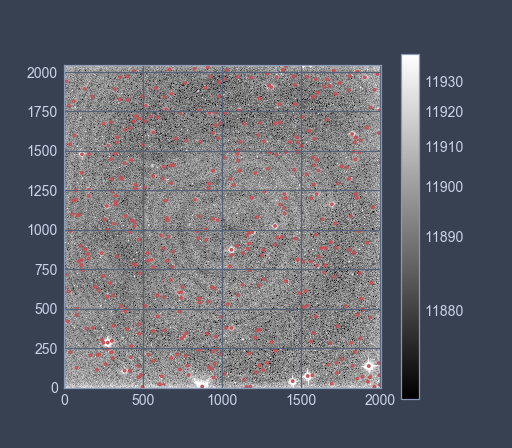

SEJveChjaGlsZHJlbj0oVG9nZ2xlQnV0dG9uKHZhbHVlPUZhbHNlLCBkZXNjcmlwdGlvbj11J1Nob3cvaGlkZSBhcGVydHVyZXMnKSwgVGV4dCh2YWx1ZT11JycsIGRlc2NyaXB0aW9uPXUnU2XigKY=


In [12]:
#################################################################################
#::: Stacked Image
##################################################################################

apertures_w = widgets.ToggleButton(
    value=False,
    description='Show/hide apertures'
)

image_select_w = widgets.Text(
    value='',
    description='Selected',
    disabled=True
)

#collector = ''
def onclick(event):
    try:
        telescope = telescope_w.value
        field_name, filter_band = field_and_filter_w.value.split('_')
        #collector = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f'%(
            #event.button, event.x, event.y, event.xdata, event.ydata)
        obj_id_selected = specio.find_ccdx_ccdy_from_stacked_image(float(event.xdata),float(event.ydata),telescope,field_name,filter_band)
        image_select_w.value = str(obj_id_selected)
    except:
        image_select_w.value = '-'
    
def show_stackimage():
    try:
        telescope = telescope_w.value
        field_name, filter_band = field_and_filter_w.value.split('_')
        obj_id = obj_id_w.value
        fig, ax, apt_artist = specio.plot_stackimage(telescope, field_name, filter_band, obj_id=obj_id)
        cid = fig.canvas.mpl_connect('button_press_event', onclick)
        return apt_artist
    except:
        print("No data available")


def query_again(b):
    obj_id_w.value = image_select_w.value
    run_all(True)
    
button2 = widgets.Button(description="New query")
button2.on_click(query_again)


if 'Image' in show_w.value:
    apt_artist = show_stackimage()
    hbox3 = widgets.HBox([apertures_w, image_select_w, button2])
    display(hbox3)
else:
    clear_output()
    
def overplot_apertures(b):
    if apertures_w.value:
        for ln in apt_artist:
            ln.set_visible(False)
    else:
        for ln in apt_artist:
            ln.set_visible(True)
apertures_w.observe(overplot_apertures, 'value')


In [13]:
def show_infos():    
    clear_output()
    try:
        telescope = telescope_w.value
        field_name, filter_band = field_and_filter_w.value.split('_')
        obj_id = obj_id_w.value
        specio.print_infos(telescope, field_name, filter_band, obj_id=obj_id)
    except:
        print("No data available")

if 'Infos' in show_w.value:
    show_infos()
else:
    clear_output()



Callisto Sp0544-2433 I+z SP000000
Gaia ID: 2915186615251096576
Nights: 17
Images: 4891
Mean exposure: 50 s
Hours observed: 67.9 h
Date range: from 2018-02-03 to 2018-03-18
Mean flux: 3433
G-mag: 15.3


### Plots

<IPython.core.display.Javascript object>


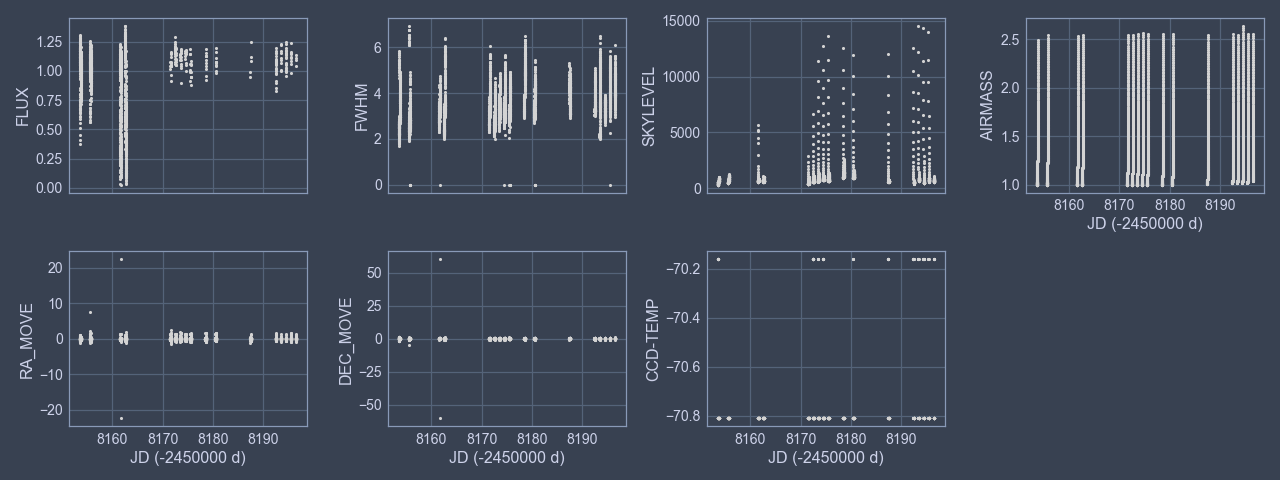

In [14]:
#::: run
def show_overview():
    clear_output()
    try:
        telescope = telescope_w.value
        field_name, filter_band = field_and_filter_w.value.split('_')
        obj_id = obj_id_w.value
        date = date_w.value[0:10]
        extra_keys = list( extra_plot_selection_w.value )
        figsize = display_size_w.value
        if date[0:3] == 'all': date = 'all'
        if date=='all':
            fig_overview, axes_overview = specio.plot_overview(telescope, field_name, filter_band, extra_keys=extra_keys, obj_id=obj_id, figsize=figsize)
        else:   
            fig_overview, axes_overview = specio.plot_overview(telescope, field_name, filter_band, extra_keys=extra_keys, obj_id=obj_id, time_date=date, figsize=figsize)
    except:
        print("No data available")

if 'Plots' in show_w.value:
    show_overview()
else:
    clear_output()

### Observing table

### ACP pointing

In [15]:
#################################################################################
#::: Observing stats table
##################################################################################
def show_stats():
    clear_output()
    try:
        telescope = telescope_w.value
        field_name, filter_band = field_and_filter_w.value.split('_')
        obj_id = obj_id_w.value
        date = date_w.value[0:10]
        if date[0:3] == 'all': date = 'all'
        if date=='all':
            df = specio.load_observing_log(telescope=telescope, field_name=field_name, filter_band=filter_band)
        else:
            df = specio.load_observing_log(telescope=telescope, field_name=field_name, filter_band=filter_band, date=date)
        if not df.empty:
            display(df)
        else:            
            print("No data available")
    except:
        print("No data available")

if 'Obs. table' in show_w.value:
    show_stats()
else:
    clear_output()

In [16]:
#################################################################################
#::: ACP pointing
#################################################################################

#::: show ACP pointing plot
def show_ACP_pointing_plot():
    clear_output()
    try:
        telescope = telescope_w.value
        field_name, filter_band = field_and_filter_w.value.split('_')
        obj_id = obj_id_w.value
        date = date_w.value[0:10]
        if date[0:3] == 'all': date = 'all'
        if date=='all':
            specio.plot_ACP_pointing(telescope)
        else:
            specio.plot_ACP_pointing(telescope,time_hjd=date)
    except:
        pass

if 'ACP pointing' in show_w.value:
    show_ACP_pointing_plot()
else:
    clear_output()

Bug reports to Maximilian Günther, maxgue@mit.edu